In [2]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#Reading Data
df=pd.read_csv("Hotel_Reviews_raw.csv")

In [150]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

This data has 16 variables where latitude asn longitude values have some missing values

## Data Preprocessing

In [4]:
#Mining Trip type information from tags
df['Leisure'] = df['Tags'].map(lambda x: 1 if ' Leisure trip ' in x else 0)
df['Business'] = df['Tags'].map(lambda x: 2 if ' Business trip ' in x else 0)
df['Trip_type'] = df['Leisure'] + df['Business']

In [5]:
import random
df['Trip_type'] = df[df['Trip_type'] == 0]['Trip_type'].map(lambda x: 1 if random.random() > 0.2 else 2)
df['Trip_type'] = df['Trip_type'].fillna(0)
df['Trip_type'] = df['Trip_type'] + df['Business'] + df['Leisure']
del df['Leisure'] , df['Business']

In [6]:
#converting to original Labels
y=[]
for i in df['Trip_type']:
    if i==1.0:
        y.append("Leisure_trip")
    if i==2.0:
        y.append("Business_trip")
df['Trip_type']=y

In [7]:
#Spliting countries from Hotel address

df['hotel_country'] = df.Hotel_Address.apply(lambda x: x.split(' ')[-1])
df.hotel_country = df.hotel_country.str.replace('Kingdom','UK')

In [8]:
#Categorizing reviewer type based on number of reviews
x=[]
for i in df['Total_Number_of_Reviews_Reviewer_Has_Given']:
    if (i<=4): 
        x.append('Newbie')
    elif (i>4 and i<9):
        x.append('Regular_traveller')
    else:
        x.append('Extreme_traveller')

df['Reviewer_type']=x

## Visualization

<AxesSubplot:xlabel='Reviewer_type', ylabel='count'>

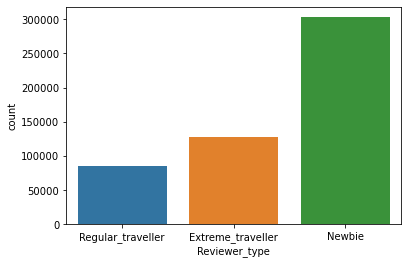

In [157]:
sns.countplot(df['Reviewer_type'])# Count plot of traveller type

Most of the reviews are from newbie where reviewed less than 5 times and followed by Extreme Travellers who reviewed more than 8 times

<AxesSubplot:>

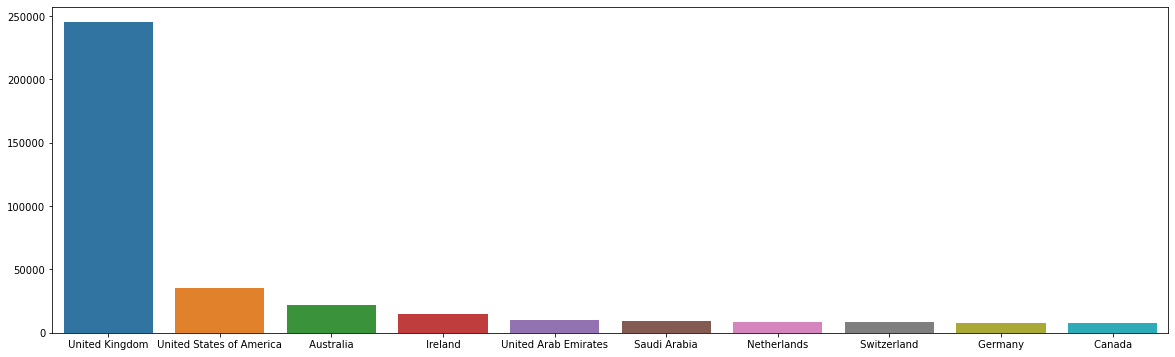

In [158]:
#Plot of reviewer nationality count
plt.figure(figsize = (20,6))
rev_nation=df['Reviewer_Nationality'].value_counts()
rev_nation=rev_nation.sort_values(ascending=False)
rev_nation=rev_nation[:10]
sns.barplot(x=rev_nation.index,y=rev_nation.values)


We can clearly understand from this plot that the reviewers from United Kigdom contributed more in writing reviews about the hotel 

<AxesSubplot:xlabel='Trip_type', ylabel='count'>

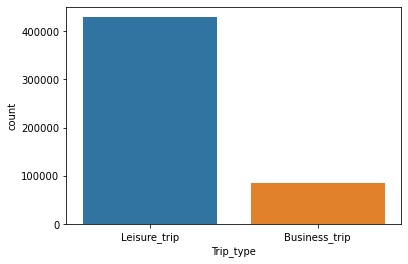

In [159]:
sns.countplot(df['Trip_type'])

<AxesSubplot:xlabel='Reviewer_type', ylabel='Reviewer_Score'>

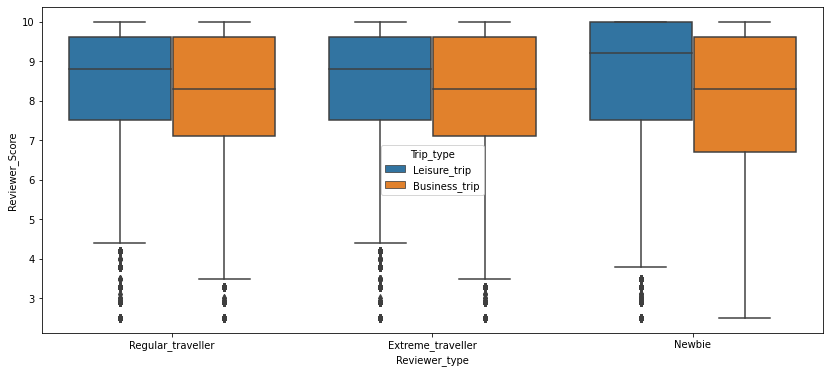

In [160]:
#Box plot of reviewer type and average score partitioned by trip type
plt.figure(figsize = (14,6))
sns.boxplot(df['Reviewer_type'],df['Reviewer_Score'],hue=df['Trip_type'])

* There are some Liesure trip travellers who are extremely displeased with the hotel in all reviewer type
* All the Business trip travellert follows same distribution of review score except newbie

<AxesSubplot:xlabel='hotel_country', ylabel='count'>

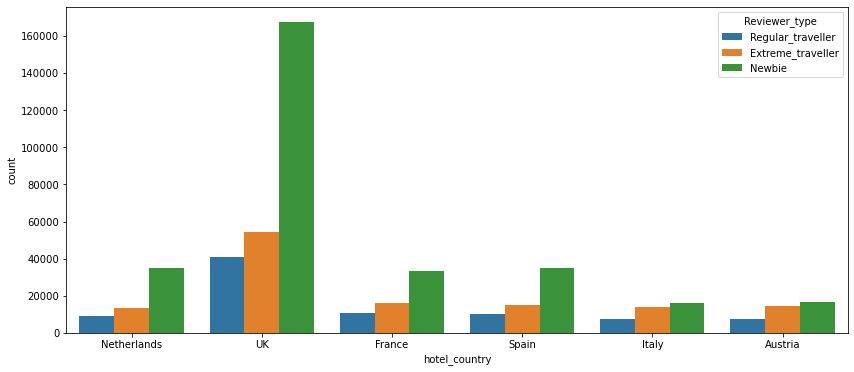

In [161]:
#Count plot by country of hotel and reviewer type
plt.figure(figsize = (14,6))
sns.countplot(df['hotel_country'],hue=df['Reviewer_type'])

* Most of the reviews are from newbie who have visited united Kingdom hotels
* Most of the reviews in the data contains united kingdom hotel reviews


<AxesSubplot:xlabel='hotel_country', ylabel='count'>

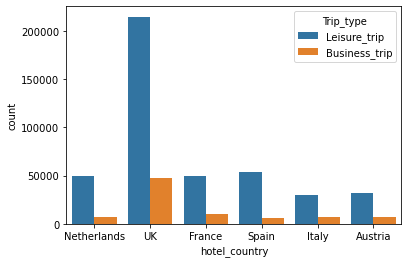

In [162]:
sns.countplot(df['hotel_country'],hue=df['Trip_type'])#Count plot by trip type

* Most reviews are from travellers who come for Leisure trip
* UK tops in the reviews count than other countries

In [21]:
df_avg_review_hotel=df.groupby(['Hotel_Name'])['Reviewer_Score'].agg('mean').reset_index()

In [164]:
df_avg_review_hotel=df_avg_review_hotel.sort_values('Reviewer_Score',ascending=False)

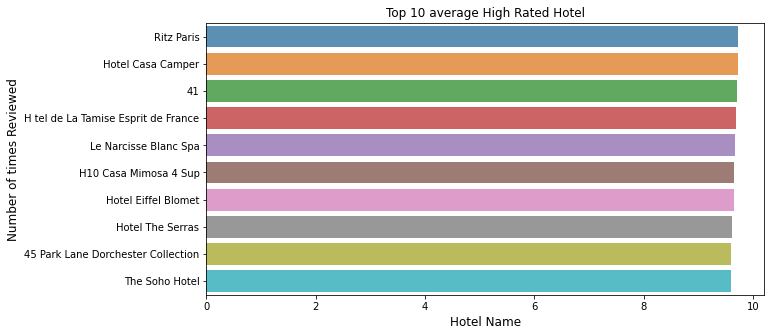

In [165]:
#Top 10 high rated hotel
hotel_rev_count=df_avg_review_hotel[:10]
plt.figure(figsize=(10,5))
sns.barplot(y=hotel_rev_count['Hotel_Name'],x=hotel_rev_count['Reviewer_Score'] , alpha=0.8)
plt.title('Top 10 average High Rated Hotel')
plt.ylabel('Number of times Reviewed', fontsize=12)
plt.xlabel('Hotel Name', fontsize=12)
plt.show()

These are the top 10 Hotels which has highest average score review

In [22]:
df_avg_review_hotel_low=df_avg_review_hotel.sort_values('Reviewer_Score')

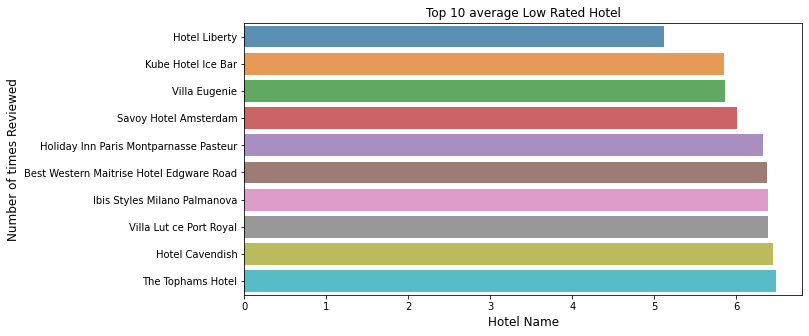

In [24]:
#Top 10 low rated hotel
hotel_rev_count=df_avg_review_hotel_low[:10]
plt.figure(figsize=(10,5))
sns.barplot(y=hotel_rev_count['Hotel_Name'],x=hotel_rev_count['Reviewer_Score'] , alpha=0.8)
plt.title('Top 10 average Low Rated Hotel')
plt.ylabel('Number of times Reviewed', fontsize=12)
plt.xlabel('Hotel Name', fontsize=12)
plt.show()

<AxesSubplot:xlabel='Reviewer_Score', ylabel='Count'>

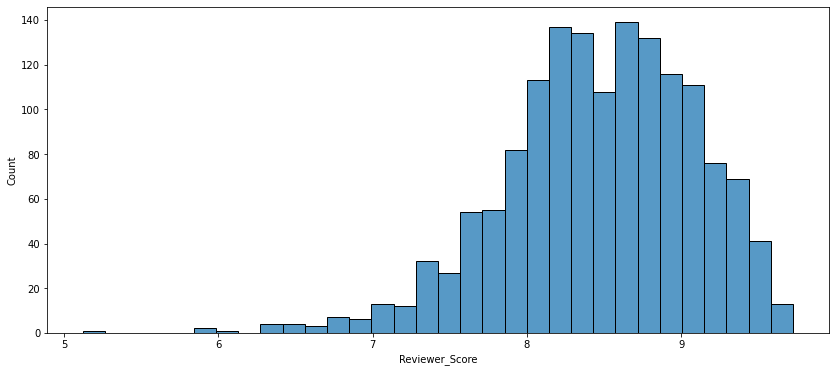

In [166]:
plt.figure(figsize = (14,6))
sns.histplot(df_avg_review_hotel['Reviewer_Score'])# Average Reviewer Score distribution by Hotel

Scores are distributed normally with positve shift, this denotes that very few reviewer is very disappointed with the hotel 

Text(0.5, 1.0, 'Average Review Score by Country')

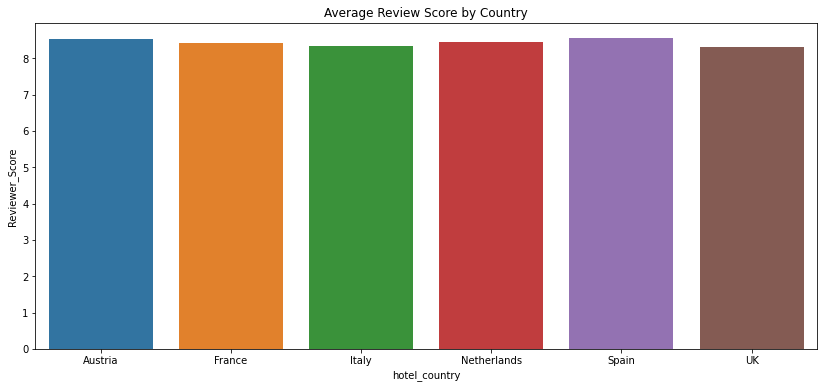

In [167]:
# average review score by country
df_avg_review_country=df.groupby(['hotel_country'])['Reviewer_Score'].agg('mean').reset_index()
plt.figure(figsize = (14,6))
sns.barplot(df_avg_review_country['hotel_country'],df_avg_review_country['Reviewer_Score'])
plt.title("Average Review Score by Country")

All the country have same level of average review score so this doesnt show any bias between countries

Text(0.5, 1.0, 'Boxplot of average review score by country')

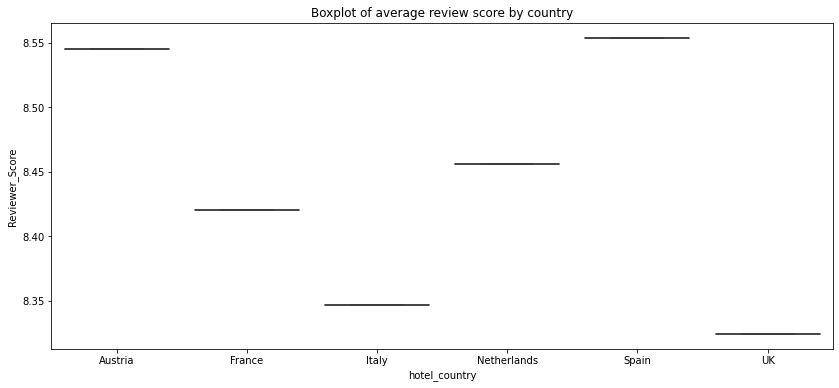

In [168]:
plt.figure(figsize = (14,6))#comparison of average review score by country
sns.boxplot(df_avg_review_country['hotel_country'],df_avg_review_country['Reviewer_Score'])
plt.title("Boxplot of average review score by country")

By comparing averages with narrow difference by country in review score UK is the least andSpain tops

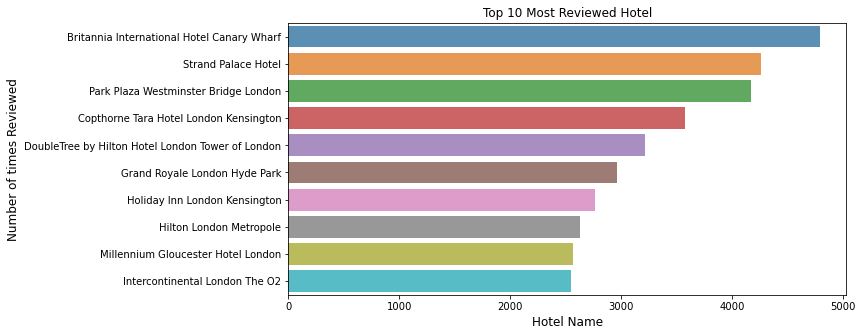

In [169]:
# Top 10 More Reviewed Hotel
hotel_count=df['Hotel_Name'].value_counts()
hotel_count=hotel_count[:10]
plt.figure(figsize=(10,5))
sns.barplot(y=hotel_count.index,x= hotel_count.values, alpha=0.8)
plt.title('Top 10 Most Reviewed Hotel')
plt.ylabel('Number of times Reviewed', fontsize=12)
plt.xlabel('Hotel Name', fontsize=12)
plt.show()

These are top 10 most reviewed Hotels , in which 'Britannia International Hotel' tops with more than 4500 reviews

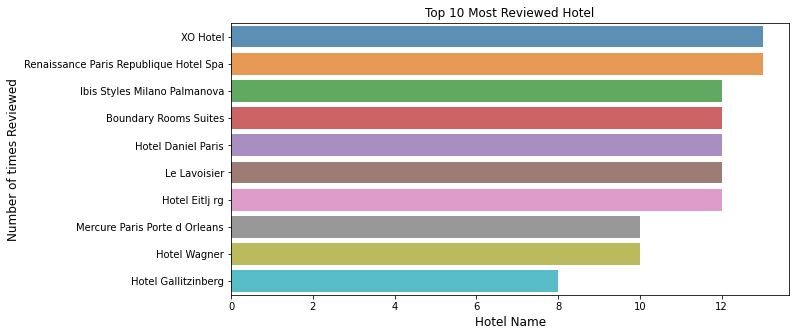

In [33]:
# Top 10 Least Reviewed Hotel
hotel_count=df['Hotel_Name'].value_counts()
hotel_count=hotel_count[-10:]
plt.figure(figsize=(10,5))
sns.barplot(y=hotel_count.index,x= hotel_count.values, alpha=0.8)
plt.title('Top 10 Most Reviewed Hotel')
plt.ylabel('Number of times Reviewed', fontsize=12)
plt.xlabel('Hotel Name', fontsize=12)
plt.show()

These are top 10 least reviewed Hotels , in which 'Hotel Gallitzinberg' least reviewed with less than 8 reviews

In [171]:
df['year'] = pd.DatetimeIndex(df['Review_Date']).year
df['month'] = pd.DatetimeIndex(df['Review_Date']).month


In [172]:
df_month=df.groupby(['month'])['Reviewer_Score'].agg('count').reset_index()

Text(0.5, 1.0, 'Review count by month')

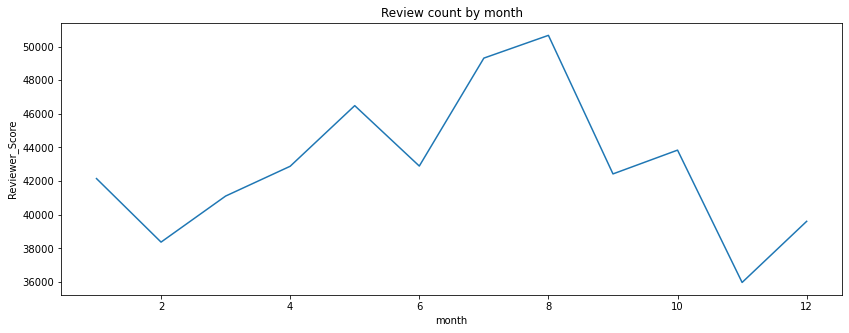

In [173]:
plt.figure(figsize=(14,5))
sns.lineplot(df_month['month'],df_month['Reviewer_Score'])
plt.title("Review count by month")

* Month 8 (August month) is where most people travel and review when compared to  other months
* Month 11 (November) where people travel less

In [174]:
df_year=df.groupby(['year'])['Reviewer_Score'].agg('count').reset_index()

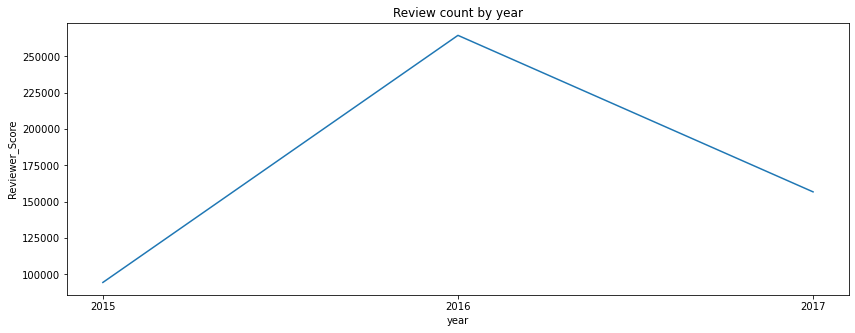

In [175]:
plt.figure(figsize=(14,5))
sns.lineplot(df_year['year'],df_year['Reviewer_Score'])
plt.xticks(np.arange(min(df_year['year']), max(df_year['year'])+1, 1.0))
plt.title("Review count by year")
plt.show()

In 2016 most of the people travelled and reviewed when comparing to other years

In [12]:
#!pip install wordcloud

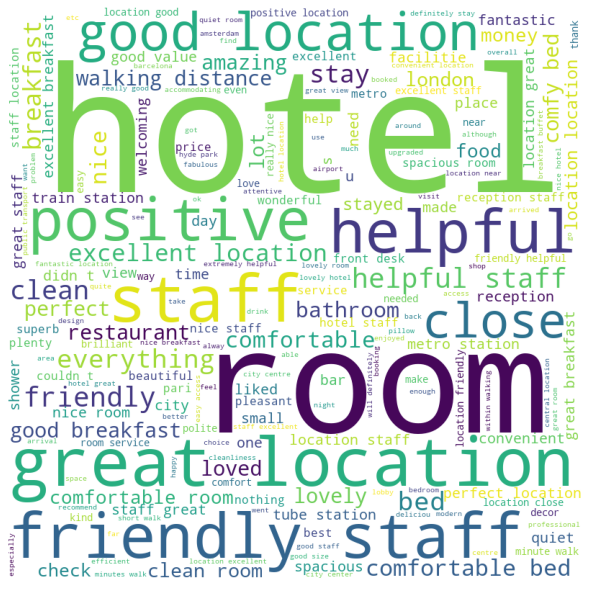

In [11]:
#After preprocessing of translated data
#word cloud for top 3 groups data
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#word cloud for overall data
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df.Positive_Review:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud= WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Most of the postive reviews depends on the factor 
* Hotel staff like helpful,friendly etc
* Room cleanliness,Location of hotel, good breakfast,comfortable stay,clean bathroom etc

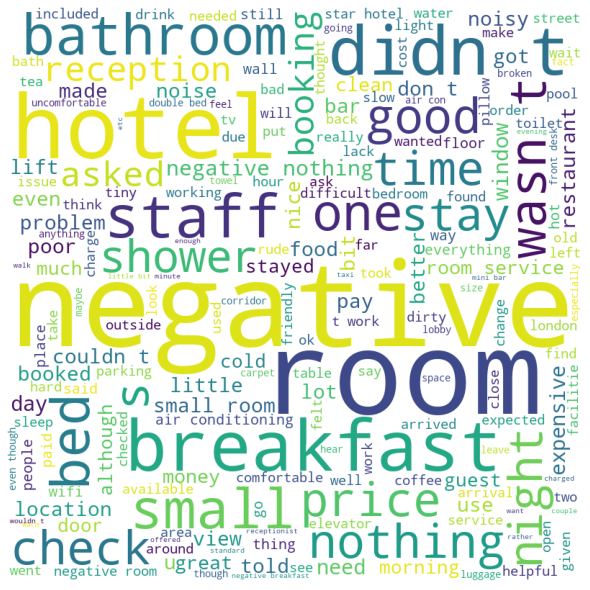

In [13]:
#After preprocessing of translated data
#word cloud for top 3 groups data
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#word cloud for overall data
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the variable
for val in df.Negative_Review:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud= WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Negative comments depends on the factor 
* breakfast, room and hotel cleanliness
* price of room. bed of room, bathroom hygiene etc  
* Other factors like noisy,comfortness of room etc

## Conclusion

In the above findings we could conclude the following points
* This data contains 515738 Hotels reviews from reviewer around the globe from the year 2015-2017
* This data focus on Hotels from 6 European countries (UK.Austri, France,Italy,Netherland and Spain)
* On an average reviewer score is around 8.5 diatributed among 6 countries
* Most of reviewers posted around 1-4 reviews who are categorised as newbie
* Most of the travellers visited UK when compared to other countries and most of them purpose of visit is leisure trip 
* Most reviewed hotel is Britannia International Hotel. So people prefer to stay in that hotel when visiting UK
* Most Low rated hotel on an average review score is Hotel Liberty in Italy
* Most high rated Hotel on an average review score is Ritz Paris
* Hotel Gallitzinberg is least reviewed hotel where may be less number of people visited the hotel
* August month where most of the people travel and give reviews
* November is the least traveller visiting month
* On the year 2016 where most of them reviewed when compared to other year
* Most of Reviewers evaluate thier stay through room cleanliness, staff behaviour, breakfast and location